# Scraping houses on <font color='red'>real</font>tor.com

##### Importing libraries

In [3]:
import bs4 as bs
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import time
from time import sleep
import matplotlib.pyplot as plt
import urllib
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs", prefs)
chrome_options.add_argument("--start-maximized")
import glob as glob2

##### Homepage

In [2]:
home = 'https://www.realtor.com'

##### Functions

In [3]:
def fetch(page, addition=''):
    return bs.BeautifulSoup(urlopen(Request(page + addition,
            headers={'User-Agent': 'Opera/9.80 (X11; Linux i686; Ub'\
                     'untu/14.10) Presto/2.12.388 Version/12.16'})).read(), 'lxml')

In [4]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
           'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [2]:
def progress_bar(progress, total, ix, ix_total):
    percentage = int((progress*100)/total)
    init_space = ' '*(3 -len(str(percentage)))
    bars = '='*min(29, int((percentage/100)*30) )+ '>' + '-'*(29-int((percentage/100)*30))
    elapsed_time = int(time.time()-start)
    print('\r', '{}{}% [{}] - Elapsed: {}s'.format(init_space,
                                    percentage, bars, elapsed_time), end='')
    if progress==total:
        print('str(ix)'+'/'+{str(ix_total)}, '{}{}% [{}] - Elapsed: {}s'.format(init_space,
                                                   percentage, '='*30, elapsed_time), end='')

##### Homepage screenshot

In [8]:
driver = webdriver.Chrome(r'C:/Users/Nicolas/Downloads/chromedriver.exe', options=chrome_options)
driver.get(home)
driver.save_screenshot("test.png")
driver.quit()

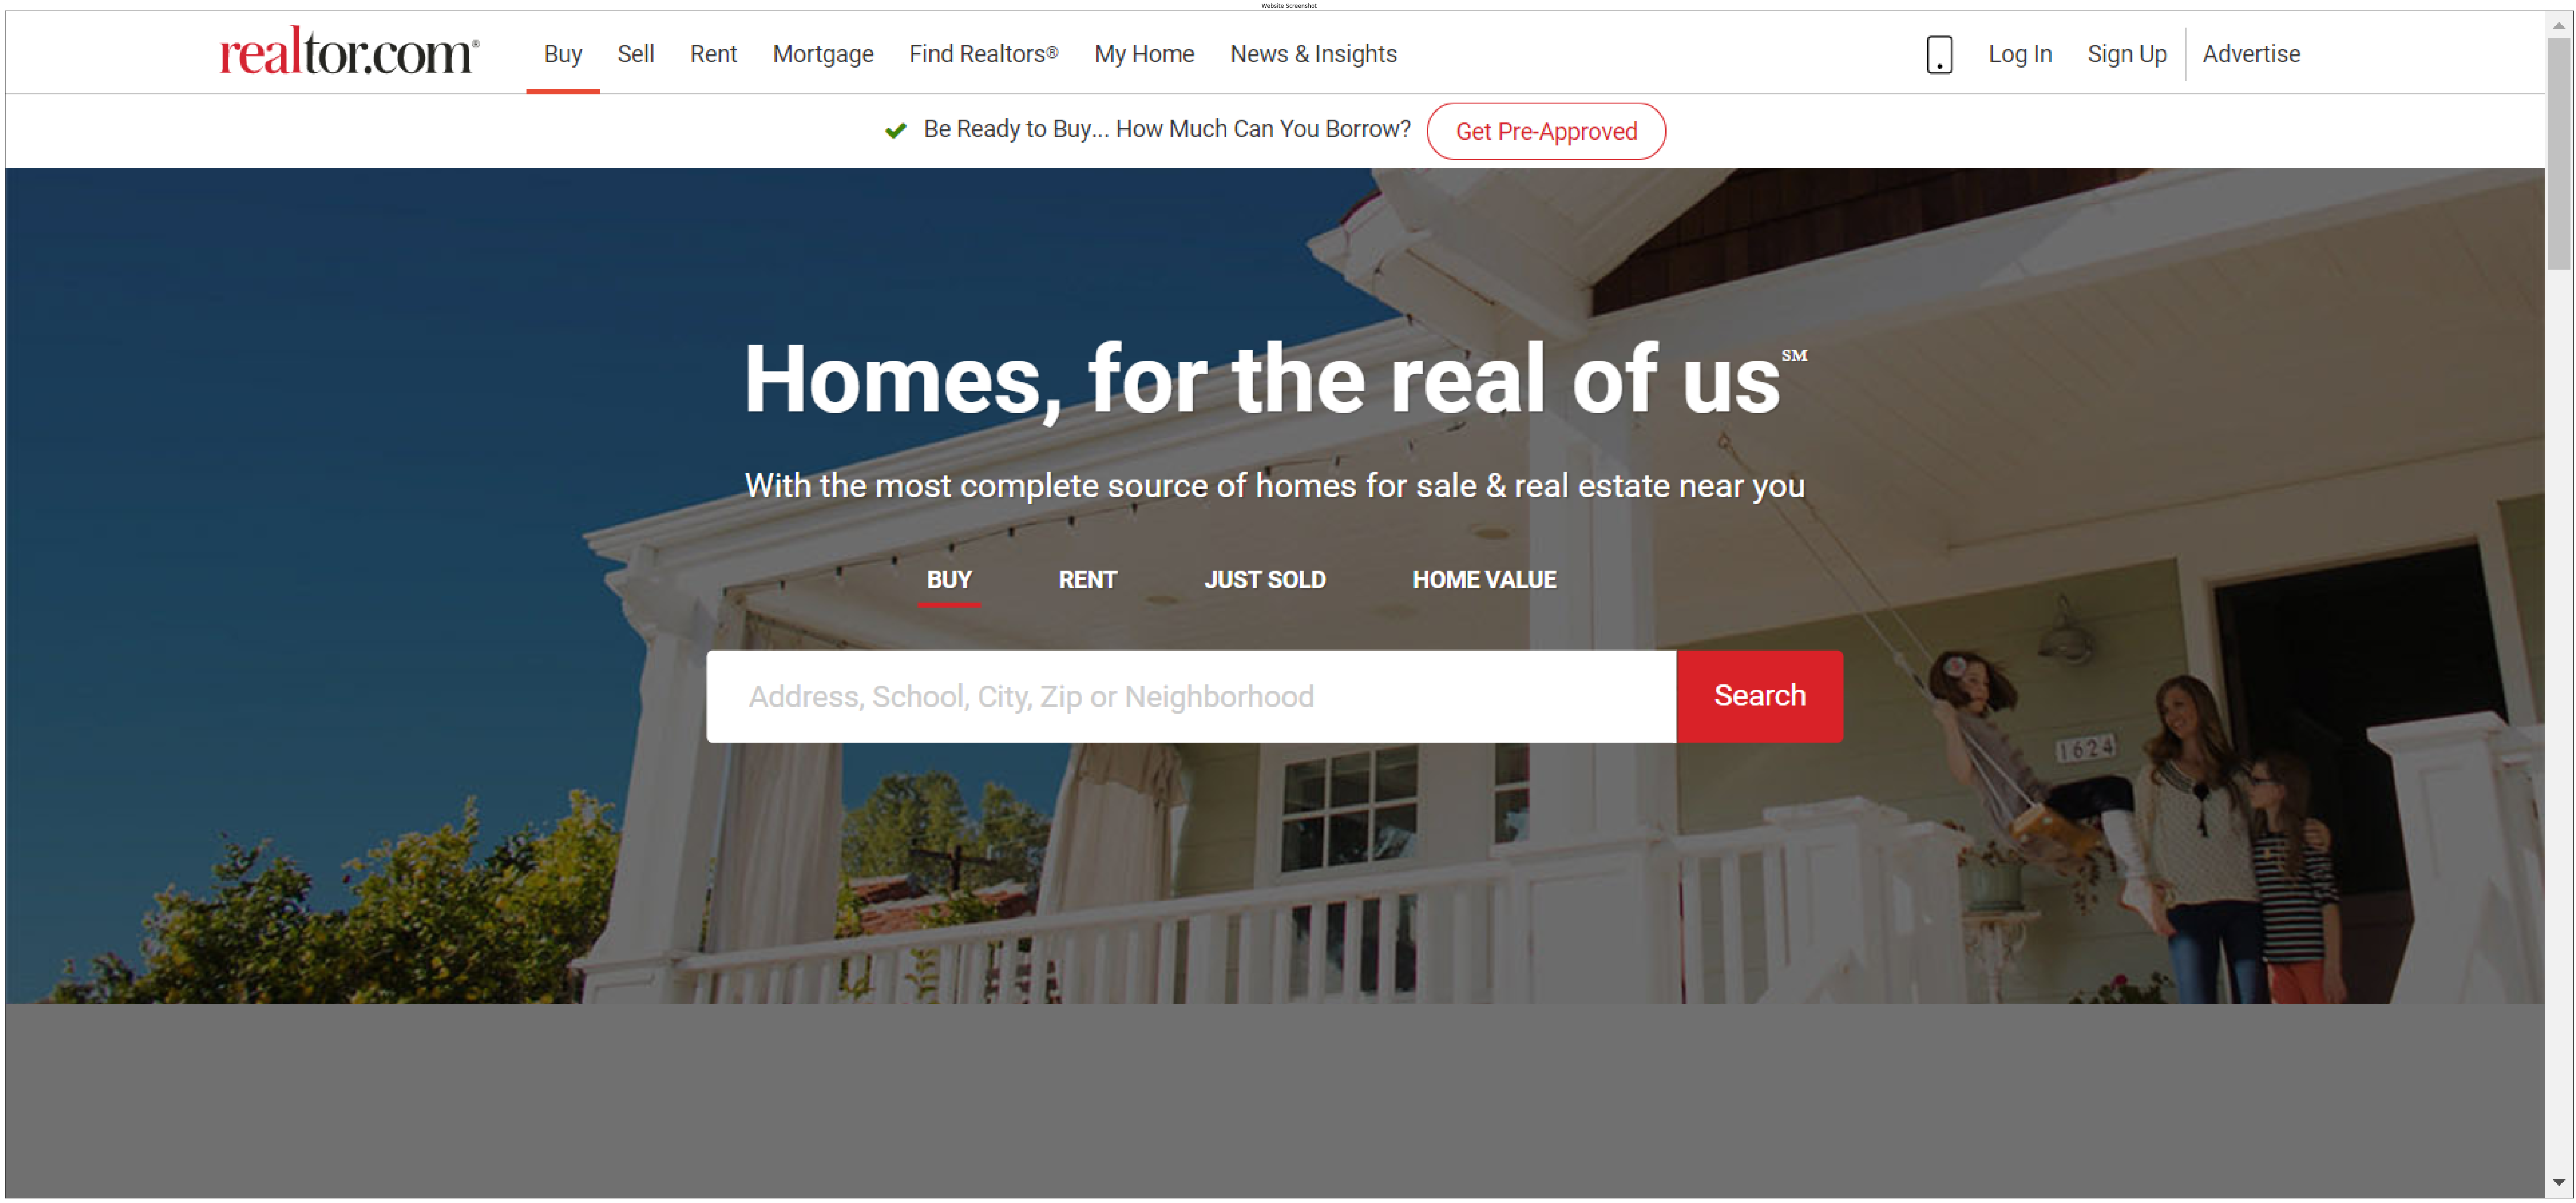

In [11]:
fig=plt.figure(figsize=(100, 100))
yticks=plt.yticks([]); xticks=plt.xticks([])
plt.title('Website Screenshot')
screenshot=plt.imread('test.png', 'jpg')
screencap=plt.imshow(screenshot)

##### Example Room

In [12]:
house = 'https://www.realtor.com/realestateandhomes-detail/14037-Fontana-Rd_Roanoke_TX_76262_M76596-84165'
pics = []

for i in fetch(house).find_all('img'):
    pics.append(i.get(''
                      'data-src'))
f = urlopen(pics[13])

image=plt.imread(f, 'jpg')

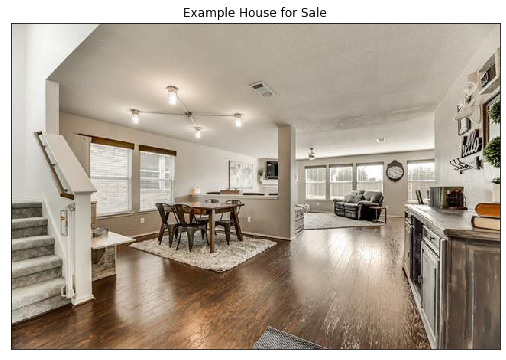

In [13]:
fig = plt.figure(figsize=(9, 6))
yticks=plt.yticks([]); xticks=plt.xticks([])
title=plt.title('Example House for Sale')
living_room=plt.imshow(image)

##### Get Popular Real Estate Markets

In [4]:
popular_markets = []
ix = 0

for market in fetch(home).find_all('ul', 
            {'class':'jsx-3652141321 list-unstyled '\
             'link-secondary'})[0].find_all('li'):
    for item in market:
        ix+=1
        zone = item['href'] 
        print(str(ix), zone)
        popular_markets.append(zone)

1 https://www.realtor.com/realestateandhomes-search/Washington_DC
2 https://www.realtor.com/realestateandhomes-search/Chicago_IL
3 https://www.realtor.com/realestateandhomes-search/Dallas_TX
4 https://www.realtor.com/realestateandhomes-search/Fort-Worth_TX
5 https://www.realtor.com/realestateandhomes-search/Houston_TX
6 https://www.realtor.com/realestateandhomes-search/Philadelphia_PA
7 https://www.realtor.com/realestateandhomes-search/Los-Angeles_CA
8 https://www.realtor.com/realestateandhomes-search/Atlanta_GA
9 https://www.realtor.com/realestateandhomes-search/Phoenix_AZ
10 https://www.realtor.com/realestateandhomes-search/Boston_MA
11 https://www.realtor.com/realestateandhomes-search/Miami_FL
12 https://www.realtor.com/realestateandhomes-search/Orlando_FL
13 https://www.realtor.com/realestateandhomes-search/San-Diego_CA
14 https://www.realtor.com/realestateandhomes-search/Tampa_FL
15 https://www.realtor.com/realestateandhomes-search/Las-Vegas_NV
16 https://www.realtor.com/realestat

##### Get All Pages for a Market

In [5]:
list_pages = []

In [11]:
for ix, market in enumerate(popular_markets[38:]): # start from market that failed to scrape
    try:
        inspection = fetch(market).find_all('span', 
                            {'class':'page'})
        if len(inspection) > 1: 
            nb_pages = fetch(market).find_all('span', 
                            {'class':'page'})[-1].find_all('a')[0].text
            print(str(ix), market, nb_pages)
        else: 
            if len(inspection) < 2:
                nb_pages = fetch(market).find_all('li', 
                                {'class':'jsx-4098248002 pagination-number '\
                                 'pagination-exceeds-srp-max'})[0].text
                print(str(ix), market, nb_pages)
        
        for i in range(1, int(nb_pages) + 1):
            list_pages.append(market + '/pg-%i'%i)
            
    except:
        print('Problem with %s'%market)
        raise TypeError('One of the markets failed to scrape')
            
    inspection, nb_pages = [], 0 # resetting

0 https://www.realtor.com/realestateandhomes-search/San-Jose_CA 47
1 https://www.realtor.com/realestateandhomes-search/Seattle_WA 70


The one in New York is no good. Let's save this

How many pages do we have?

In [12]:
len(list_pages)

5718

In [16]:
pd.DataFrame(list_pages).to_csv('C:/Users/Nicolas/Documents/Scra'\
                                'ping/realtor/popular_markets.csv', header=None, index=None)# only once per session

Let's see what the URLs look like:

In [17]:
np.random.choice(list_pages, 10)

array(['https://www.realtor.com/realestateandhomes-search/Miami_FL/pg-122',
       'https://www.realtor.com/realestateandhomes-search/Atlanta_GA/pg-177',
       'https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-40',
       'https://www.realtor.com/realestateandhomes-search/Jacksonville_FL/pg-13',
       'https://www.realtor.com/realestateandhomes-search/Austin_TX/pg-5',
       'https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-518',
       'https://www.realtor.com/realestateandhomes-search/Philadelphia_PA/pg-69',
       'https://www.realtor.com/realestateandhomes-search/Miami_FL/pg-368',
       'https://www.realtor.com/realestateandhomes-search/Houston_TX/pg-161',
       'https://www.realtor.com/realestateandhomes-search/Manhattan_NY/pg-82'],
      dtype='<U75')

##### Getting the Real Estate Listed on One Page

Loading the pages

In [6]:
pages = pd.read_csv('C:/Users/Nicolas/Documents/Scra'\
                'ping/realtor/popular_markets.csv', index_col=None, 
                header=None)
pages.columns = ['URL']

In [21]:
random_page = pages.iloc[np.random.randint(pages.shape[0])].values[0]
random_page

'https://www.realtor.com/realestateandhomes-search/Manhattan_NY/pg-130'

Let's see what the page looks like now so we know what we're up against:

In [66]:
driver = webdriver.Chrome(r'C:/Users/Nicolas/Downloads/chromedriver.exe', options=chrome_options)
driver.get(random_page)
driver.save_screenshot("list_view.png")
driver.quit()

True

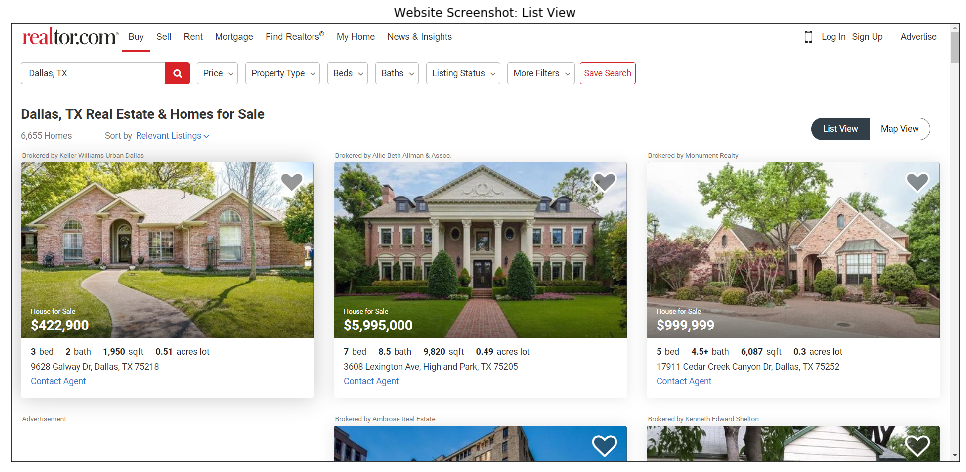

In [10]:
fig=plt.figure(figsize=(17, 17))
yticks=plt.yticks([]); xticks=plt.xticks([])
plt.title('Website Screenshot: List View')
screenshot=plt.imread('list_view.png', 'jpg')
screencap=plt.imshow(screenshot)

What we're working with at the moment:

In [22]:
for page in pages.values[:10]:
    print(page)

['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-1']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-2']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-3']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-4']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-5']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-6']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-7']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-8']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-9']
['https://www.realtor.com/realestateandhomes-search/Washington_DC/pg-10']


Scraping URLs

In [10]:
# for page in pages.iloc[:10, 0]:
#     for house in fetch(page).find_all('div', 
#                                 {'data-label':'property-address'}):
#         ix+=1
#         url = house.find_all('a')[0]['href']
#         list_houses.append(home + url)
#         if ix%1_0 == 0: 
#             ix_files+=1
#             pd.DataFrame(list_houses).to_csv('C:/Users/Nicolas/Documents/Scra'\
#             'ping/realtor/list_houses/{}.csv'.format(ix_files), 
#                                                      header=None, index=None)
#             list_houses = []

In [2]:
start_timer = time.time()
list_houses = []
ix, ix_pages = np.zeros(2)

for page in pages.iloc[3500:, 0]: # **** next 
    try:
        for house in fetch(page).find_all('div', 
                                {'data-label':'property-address'}):
            url = house.find_all('a')[0]['href']
            list_houses.append(home + url)
            ix+=1
            if ix%1_000 == 0:
                pd.DataFrame(list_houses).to_csv('C:/Users/Nicolas/Documents/Scra'\
                'ping/realtor/list_houses/{}.csv'.format(''.join(np.random.choice(letters, 20))), 
                                                         header=None, index=None)
                list_houses = []
    except:
        print('Problem with {}'.format(page))
        
    ix_pages += 1
    if ix_pages%100==0:
        print('Successfully scraped until page {}. Elapsed time: {} minutes. URLs scraped: {}.'.format(int(ix_pages), 
                                                                        int((time.time()-start_timer)/60), int(ix)))
        
pd.DataFrame(list_houses).to_csv('C:/Users/Nicolas/Documents/Scra'\
                'ping/realtor/list_houses/{}.csv'.format('final'), 
                                                         header=None, index=None)
stop_timer = time.time()

print('total duration: {} hours'.format(np.round((stop_timer-start_timer)/3_600, 1)))

Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-4
Successfully scraped until page 100. Elapsed time: 7 minutes. URLs scraped: 4356.
Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-87
Successfully scraped until page 200. Elapsed time: 14 minutes. URLs scraped: 8668.
Successfully scraped until page 300. Elapsed time: 22 minutes. URLs scraped: 12980.
Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-294
Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-299
Successfully scraped until page 400. Elapsed time: 31 minutes. URLs scraped: 17248.
Successfully scraped until page 500. Elapsed time: 40 minutes. URLs scraped: 21560.
Successfully scraped until page 600. Elapsed time: 50 minutes. URLs scraped: 25960.
Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-535
Problem with https://www.realtor.com/realestateandhomes-search/New-York_NY/pg-538
Problem wi

In [ ]:
# Successfully scraped until page 100. Elapsed time: 7 minutes. URLs scraped: 4356.
# Successfully scraped until page 200. Elapsed time: 15 minutes. URLs scraped: 8693.
# Successfully scraped until page 300. Elapsed time: 23 minutes. URLs scraped: 12961.
# Successfully scraped until page 400. Elapsed time: 32 minutes. URLs scraped: 17361.
# Successfully scraped until page 500. Elapsed time: 41 minutes. URLs scraped: 21629.
# Successfully scraped until page 600. Elapsed time: 51 minutes. URLs scraped: 25897.
# Successfully scraped until page 700. Elapsed time: 61 minutes. URLs scraped: 30165.
# Successfully scraped until page 800. Elapsed time: 70 minutes. URLs scraped: 34565.
# Successfully scraped until page 900. Elapsed time: 78 minutes. URLs scraped: 38946.
# Successfully scraped until page 1000. Elapsed time: 86 minutes. URLs scraped: 43336.
# Successfully scraped until page 1100. Elapsed time: 94 minutes. URLs scraped: 47692.
# etc

##### Scraping the Property Features

In [3]:
files = glob2.glob(r'C:\Users\Nicolas\Documents\Scraping\realtor' + 
                        '\list_houses/*.csv')
files[:10]

['C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\adydjdaghrqsupuppskp.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\aeaagddlvfznxvhwewsi.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\aftnqqxyjthtjkuargtk.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\agmfsobfndttgtgocdtm.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\ahbcwxydtciqlgjibkta.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\ahdnpoweijskdfffueko.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\akhyzbeuxwzavzfpbfyb.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\akibfdzwawgzzkzvmhju.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\alnmwqjxiayxddzdzcel.csv',
 'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\aoqnocbeoputjekvwtwh.csv']

In [41]:
random_property = np.random.choice(files)
random_property

'C:\\Users\\Nicolas\\Documents\\Scraping\\realtor\\list_houses\\80.csv'

Let's see what the page we need to scrape looks like

In [33]:
driver = webdriver.Chrome(r'C:/Users/Nicolas/Downloads/chromedriver.exe', options=chrome_options)
driver.get(random_property)
driver.save_screenshot("property.png")
driver.quit()

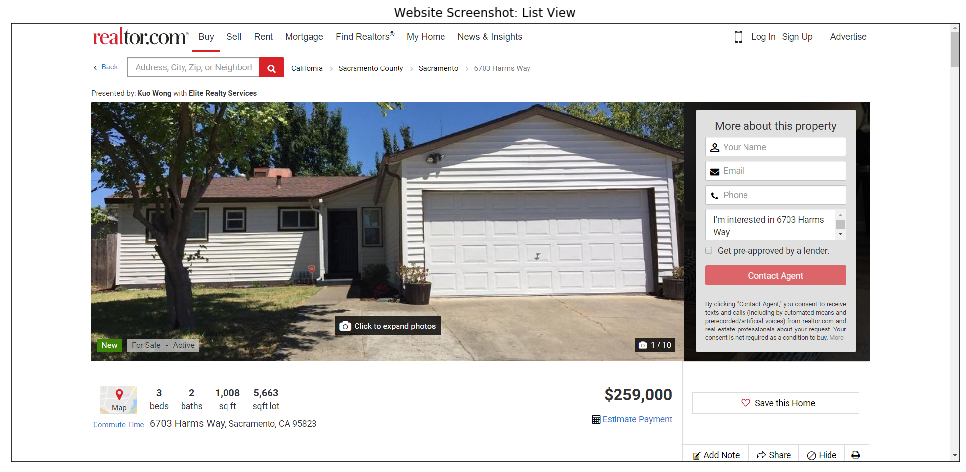

In [35]:
fig=plt.figure(figsize=(17, 17))
yticks=plt.yticks([]); xticks=plt.xticks([])
plt.title('Website Screenshot: List View')
screenshot=plt.imread('property.png', 'jpg')
screencap=plt.imshow(screenshot)

Fetching the features

In [1]:
import bs4 as bs
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import time
import glob as glob2
from time import sleep

home = 'https://www.realtor.com'

def fetch(page, addition=''):
    return bs.BeautifulSoup(urlopen(Request(page + addition,
            headers={'User-Agent': 'Opera/9.80 (X11; Linux i686; Ub'\
                     'untu/14.10) Presto/2.12.388 Version/12.16'})).read(), 'lxml')

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
           'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

files = glob2.glob(r'C:\Users\Nicolas\Documents\Scraping\realtor' + 
                        '\list_houses/*.csv')

In [ ]:
for ix_file, file in enumerate(files[1:], 1): # change indexer here
    total = len(pd.read_csv(file).iloc[:, 0]) # change locator here
    df = pd.DataFrame()
    start = time.time()
    problems = 0
    for inx, item in enumerate(pd.read_csv(file).iloc[:, 0], 1): # change locator here
        try:
            list_specs = []
            soup = fetch(item).find_all('ul', {'class':'list-default'})
            for elem in soup:
                li = elem.find_all('li')
                for line in li:
                    for element in line:
                        list_specs.append(element)
            address = fetch(item).find_all('h2', {'class':'address'})
            if len(address) < 1:
                address = fetch(item).find_all('span', {'itemprop':'streetAddress'})[0].text
            temp = pd.DataFrame([x for x in list_specs if len(x) >= 5], columns=['Features'])
            temp.index = temp['Features'].str.split(':').str.get(0)
            temp[address] = temp['Features'].str.split(':').str.get(1)
            temp.loc['Price'] = fetch(item).find_all('span', {'itemprop':'price'})[0].text.strip()
            temp.drop('Features', axis=1, inplace=True)
            df = pd.concat([df, temp.loc[~temp.index.duplicated(keep='first')]], axis=1, sort=False)
            if inx%100==0:
                df.to_csv('C:/Users/Nicolas/Documents/Scra'\
                    'ping/realtor/houses/{}.csv'.format(''.join(np.random.choice(letters, 20))))
                df = pd.DataFrame()
            percentage = int((inx*100)/total)
            init_space = ' '*(3 -len(str(percentage)))
            bars = '='*min(29, int((percentage/100)*30) )+ '>' + '-'*(29-int((percentage/100)*30))
            elapsed_time = int((time.time()-start)/60)
            print('\r', time.asctime(), '{}/{}'.format(ix_file, len(files)), '{}{}% [{}] - Elapsed: {}m'.format(init_space,
                                            percentage, bars, elapsed_time), end='')
        except: 
            problems += 1 
            if problems % 50 == 0:
                print('{}/{}, {} problems'.format(ix_file, len(files), problems))

 Sat Aug  3 17:04:35 2019 1/311  30% [=========>--------------------] - Elapsed: 60m

In [ ]:
#Sat Aug  3 15:14:35 2019 1/311  56% [================>-------------] - Elapsed: 110m